In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
import math

In [2]:
############################################
#
# Varying parameter (others fixed to default)
#
var_name = 'N_ur'
var_array = np.linspace(3.044,5.044,5)
var_num = len(var_array)
var_legend = r'$N_\mathrm{eff}$'
var_figname = 'neff'
#
# Constraints to be matched
#
# As explained in the "Neutrino cosmology" book, CUP, Lesgourgues et al., section 5.3, the goal is to vary
# - omega_cdm by a factor alpha = (1 + coeff*Neff)/(1 + coeff*3.046)
# - h by a factor sqrt*(alpha)
# in order to keep a fixed z_equality(R/M) and z_equality(M/Lambda)
#
omega_b = 0.0223828
omega_cdm_standard = 0.1201075
h_standard = 0.67810
#
# coefficient such that omega_r = omega_gamma (1 + coeff*Neff),
# i.e. such that omega_ur = omega_gamma * coeff * Neff:
# coeff = omega_ur/omega_gamma/Neff_standard 
# We could extract omega_ur and omega_gamma on-the-fly within th script, 
# but for simplicity we did a preliminary interactive run with background_verbose=2
# and we copied the values given in the budget output.
#
coeff = 1.70961e-05/2.47298e-05/3.044
print ("coeff=",coeff)
#
#############################################
#
# Fixed settings
#
common_settings = {# fixed LambdaCDM parameters
                   'omega_b':omega_b,
                   'A_s':2.100549e-09,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                   # output and precision parameters
                   'output':'tCl,pCl,lCl,mPk',
                   'lensing':'yes',
                   'P_k_max_1/Mpc':3.0,
                   'l_switch_limber':9}  
#
##############################################
#
# loop over varying parameter values
#
M = {}
#
for i, N_ur in enumerate(var_array):
    #
    # rescale omega_cdm and h
    #
    alpha = (1.+coeff*N_ur)/(1.+coeff*3.044)
    omega_cdm = (omega_b + omega_cdm_standard)*alpha - omega_b
    h = h_standard*math.sqrt(alpha)
    print (' * Compute with %s=%e, %s=%e, %s=%e'%('N_ur',N_ur,'omega_cdm',omega_cdm,'h',h))
    #
    # call CLASS
    #
    M[i] = Class()
    M[i].set(common_settings)
    M[i].set({'N_ur':N_ur})
    M[i].set({'omega_cdm':omega_cdm})
    M[i].set({'h':h})
    M[i].compute()

coeff= 0.2271076677147105
 * Compute with N_ur=3.044000e+00, omega_cdm=1.201075e-01, h=6.781000e-01
 * Compute with N_ur=3.544000e+00, omega_cdm=1.296742e-01, h=7.004938e-01
 * Compute with N_ur=4.044000e+00, omega_cdm=1.392409e-01, h=7.221936e-01
 * Compute with N_ur=4.544000e+00, omega_cdm=1.488076e-01, h=7.432601e-01
 * Compute with N_ur=5.044000e+00, omega_cdm=1.583743e-01, h=7.637457e-01


In [3]:
# esthetic definitions for the plots
font = {'size'   : 24, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

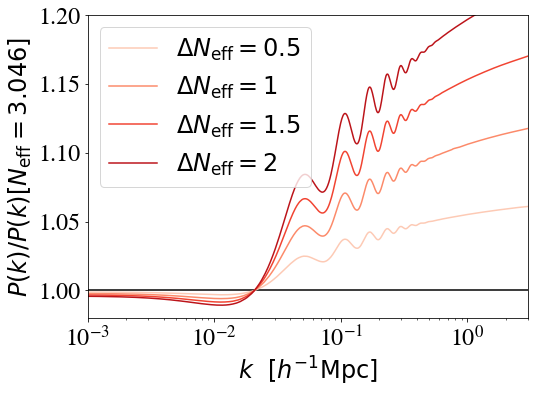

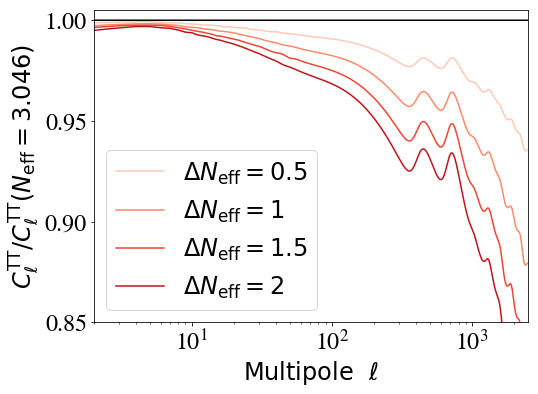

In [6]:
#############################################
#
# extract spectra and plot them
#
#############################################
kvec = np.logspace(-4,np.log10(3),1000) # array of kvec in h/Mpc
twopi = 2.*math.pi
#
# Create figures
#
fig_Pk, ax_Pk = plt.subplots()
fig_TT, ax_TT = plt.subplots()
#
# loop over varying parameter values
#
ll = {}
clM = {}
clTT = {}
pkM = {}
legarray = []

for i, N_ur in enumerate(var_array):
    #
    alpha = (1.+coeff*N_ur)/(1.+coeff*3.044)
    h = 0.67810*math.sqrt(alpha) # this is h
    #
    # deal with colors and legends
    #
    if i == 0:
        var_color = 'k'
        var_alpha = 1.
    else:
        var_color = plt.cm.Reds(0.8*i/(var_num-1))
    #
    # get Cls
    #
    clM[i] = M[i].lensed_cl(2500)
    ll[i] = clM[i]['ell'][2:]
    clTT[i] = clM[i]['tt'][2:]
    #
    # store P(k) for common k values
    #
    pkM[i] = []
    # The function .pk(k,z) wants k in 1/Mpc so we must convert kvec for each case with the right h 
    khvec = kvec*h # This is k in 1/Mpc
    for kh in khvec:
        pkM[i].append(M[i].pk(kh,0.)*h**3) 
    #    
    # plot P(k)
    #
    if i == 0:
        ax_Pk.semilogx(kvec,np.array(pkM[i])/np.array(pkM[0]),
                       color=var_color,#alpha=var_alpha,
                       linestyle='-')
    else:
        ax_Pk.semilogx(kvec,np.array(pkM[i])/np.array(pkM[0]),
                       color=var_color,#alpha=var_alpha,
                       linestyle='-',
                      label=r'$\Delta N_\mathrm{eff}=%g$'%(N_ur-3.044))
    #
    # plot C_l^TT
    #
    if i == 0:
        ax_TT.semilogx(ll[i],clTT[i]/clTT[0],
                       color=var_color,alpha=var_alpha,linestyle='-')
    else:    
        ax_TT.semilogx(ll[i],clTT[i]/clTT[0],
                       color=var_color,alpha=var_alpha,linestyle='-',
                      label=r'$\Delta N_\mathrm{eff}=%g$'%(N_ur-3.044))
#
# output of P(k) figure
#
ax_Pk.set_xlim([1.e-3,3.])
ax_Pk.set_ylim([0.98,1.20])
ax_Pk.set_xlabel(r'$k \,\,\,\, [h^{-1}\mathrm{Mpc}]$')
ax_Pk.set_ylabel(r'$P(k)/P(k)[N_\mathrm{eff}=3.046]$')
ax_Pk.legend(loc='upper left')
fig_Pk.tight_layout()
fig_Pk.savefig('ratio-%s-Pk.pdf' % var_figname)
#
# output of C_l^TT figure
#      
ax_TT.set_xlim([2,2500])
ax_TT.set_ylim([0.850,1.005])
ax_TT.set_xlabel(r'$\mathrm{Multipole} \,\,\,\,  \ell$')
ax_TT.set_ylabel(r'$C_\ell^\mathrm{TT}/C_\ell^\mathrm{TT}(N_\mathrm{eff}=3.046)$')
ax_TT.legend(loc='lower left')
fig_TT.tight_layout()
fig_TT.savefig('ratio-%s-cltt.pdf' % var_figname)